In [47]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

In [48]:
series3 = pd.read_excel('BDOFICIAL.xlsx')

In [49]:
series3.columns

Index(['Semana', 'Qtdsaida'], dtype='object')

In [50]:
def tsplot (y, title, lags = None, figsize = (12, 8)):
    fig, ((ts_ax, hist_ax), (acf_ax, pacf_ax)) = plt.subplots(2, 2, figsize = figsize);
    
    y.plot (ax = ts_ax);
    ts_ax.set_title(title, fontsize = 12, fontweight = 'bold');
    y.plot(ax = hist_ax, kind = 'hist', bins = 25);
    hist_ax.set_title('Histogram');
    sm.tsa.graphics.plot_acf(y, lags = lags, ax = acf_ax);
    sm.tsa.graphics.plot_pacf(y, lags = lags, ax = pacf_ax);
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine();
    plt.tight_layout();
    plt.show();
    return ts_ax, acf_ax, pacf_ax

In [51]:
def check_stationarity(time_series: pd.Series):
    res = sm.tsa.adfuller(time_series)
    adf = res[0]
    p_value = res[1]
    critical_value = res[4]['5%']
    if(p_value > 0.05) or (adf > critical_value):
        print('\tNon Stationary')
    else:
        print('\tStationay (p-value: %.5f | adf: %.2f | critical: %.2f' % (res[1], adf, critical_value))
        return True
    return False

In [52]:
check_stationarity(series3['Qtdsaida'].dropna())

	Stationay (p-value: 0.00000 | adf: -5.34 | critical: -2.87


True

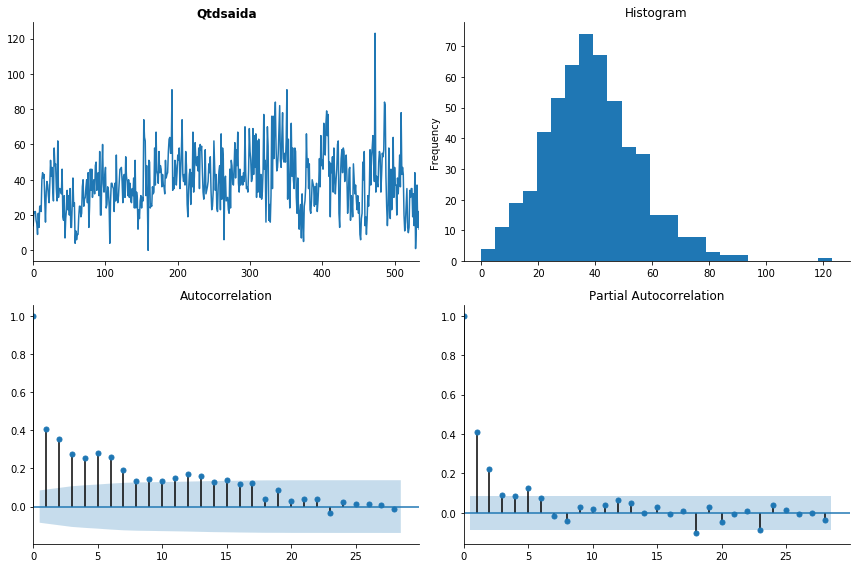

In [53]:
tsplot(series3['Qtdsaida'], 'Qtdsaida');

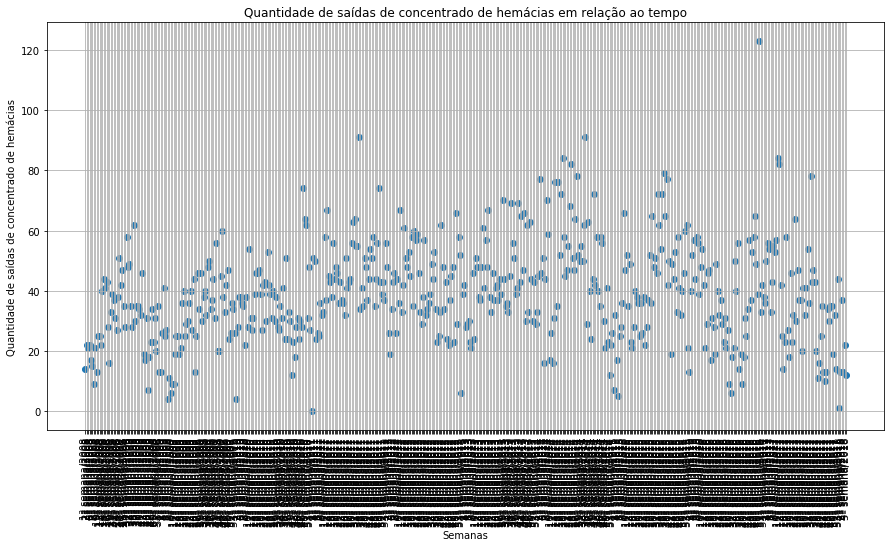

In [54]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(series3['Semana'], series3['Qtdsaida'])
plt.title('Quantidade de saídas de concentrado de hemácias em relação ao tempo')
plt.ylabel('Quantidade de saídas de concentrado de hemácias')
plt.xlabel('Semanas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()